# Chapter 4: Getting Started with neural networks: classification and regression

## Part 2

### 4.2 Classifying newswires: a multiclass classification example, the Reuters dataset


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

71/71 [==============================] - 0s 3ms/step - loss: 1.2673 - accuracy: 0.7836
result: [1.267278790473938, 0.7836152911186218]

max_accuracy: 0.8199999928474426


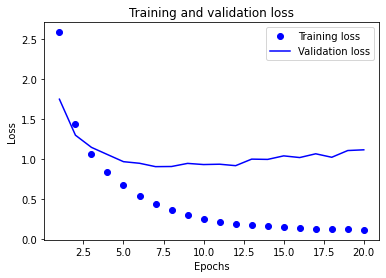

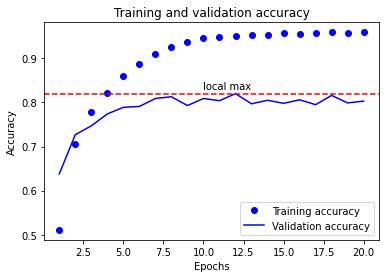

In [35]:
def listing4_11():
    import tensorflow
    from tensorflow import keras
    from tensorflow.keras import layers
    from tensorflow.keras.datasets import reuters
    from tensorflow.keras.utils import to_categorical
    import numpy as np
    import matplotlib.pyplot as plt
    
    # load data
    (train_data, train_labels), (test_data, test_labels) = reuters.load_data(
        num_words = 10_000
    )
        
    # prepare data
    def vectorize_sequences(sequences, dimension=10_000):
        # create all-zero matrix
        results = np.zeros((len(sequences), dimension))
        for i, sequence in enumerate(sequences):
            for j in sequence:
                # set indices of results[i,j] to 1s
                results[i, j] = 1.
        return results
    
    
    x_train = vectorize_sequences(train_data)
    x_test = vectorize_sequences(test_data)
        
    y_train = to_categorical(train_labels)
    y_test = to_categorical(test_labels)
    
#     print(np.asarray(train_labels).astype("float32"))
#     print()
    
#     def to_one_hot(labels, dimension=46):
#         results = np.zeros((len(labels), dimension))
#         for i, label in enumerate(labels):
#             results[i, label] = 1.
#         return results
    
#     print(to_one_hot(train_labels))

    # build model, assume 46 possible classes
    model = keras.Sequential([
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(46, activation='softmax')
    ])
    
    model.compile(
        optimizer="rmsprop",
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    
    # creating validation data
    x_val = x_train[:1000]
    partial_x_train = x_train[1000:]
    y_val = y_train[:1000]
    partial_y_train = y_train[1000:]
    
    # train model
    history = model.fit(
        partial_x_train,
        partial_y_train,
        epochs=20,
        batch_size=512,
        validation_data=(x_val, y_val),
        verbose=0,
    )
    
    print(history.history.keys())
    print()
    
    result = model.evaluate(x_test, y_test)
    print(f'result: {result}')
    print()
    
    epochs = range(1, len(history.history['loss'])+1)
    
    fig1 = plt.figure()
    ax1 = fig1.add_subplot()
    ax1.plot(epochs, history.history['loss'], "bo", label="Training loss")
    ax1.plot(epochs, history.history['val_loss'], "b", label="Validation loss")
    ax1.set_title("Training and validation loss")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")
    ax1.legend()
    
    # determine start of overfitting
    max_accuracy = np.max(history.history['val_accuracy'])
    print(f"max_accuracy: {max_accuracy}")
    
    fig2 = plt.figure()
    ax2 = fig2.add_subplot()
    ax2.plot(epochs, history.history['accuracy'], "bo", label="Training accuracy")
    ax2.plot(epochs, history.history['val_accuracy'], "b", label="Validation accuracy")
    ax2.set_title("Training and validation accuracy")
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Accuracy")
    ax2.axhline(y = max_accuracy, color = 'r', linestyle = '--')
    ax2.annotate('local max', xy=(10, max_accuracy+0.01))
    ax2.legend()
    
    plt.show()
    
listing4_11()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

71/71 [==============================] - 0s 2ms/step - loss: 0.9864 - accuracy: 0.7867
result: [0.9863608479499817, 0.7867319583892822]

max_accuracy: 0.8230000138282776



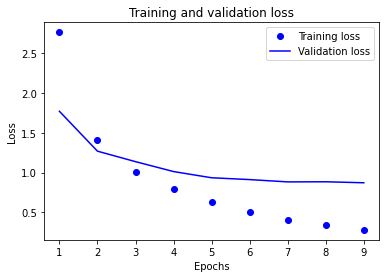

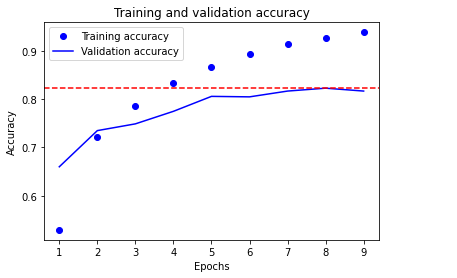

hits_array.mean(): 0.19634906500445237
This means a random classifier would score around 19.63% classification accuracy.
(46,)
1.0000001
3


In [39]:
def listing4_21():
    import tensorflow
    from tensorflow import keras
    from tensorflow.keras import layers
    from tensorflow.keras.datasets import reuters
    from tensorflow.keras.utils import to_categorical
    import numpy as np
    import matplotlib.pyplot as plt
    
    # load data
    (train_data, train_labels), (test_data, test_labels) = reuters.load_data(
        num_words = 10_000
    )
        
    # prepare data
    def vectorize_sequences(sequences, dimension=10_000):
        # create all-zero matrix
        results = np.zeros((len(sequences), dimension))
        for i, sequence in enumerate(sequences):
            for j in sequence:
                # set indices of results[i,j] to 1s
                results[i, j] = 1.
        return results
    
    
    x_train = vectorize_sequences(train_data)
    x_test = vectorize_sequences(test_data)
        
    y_train = to_categorical(train_labels)
    y_test = to_categorical(test_labels)
    
#     print(np.asarray(train_labels).astype("float32"))
#     print()
    
#     def to_one_hot(labels, dimension=46):
#         results = np.zeros((len(labels), dimension))
#         for i, label in enumerate(labels):
#             results[i, label] = 1.
#         return results
    
#     print(to_one_hot(train_labels))

    # build model, assume 46 possible classes
    model = keras.Sequential([
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(46, activation='softmax')
    ])
    
    model.compile(
        optimizer="rmsprop",
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    
    # creating validation data
    x_val = x_train[:1000]
    partial_x_train = x_train[1000:]
    y_val = y_train[:1000]
    partial_y_train = y_train[1000:]
    
    # train model
    history = model.fit(
        partial_x_train,
        partial_y_train,
        epochs=9, # reduced from 20
        batch_size=512,
        validation_data=(x_val, y_val),
        verbose=0,
    )
    
    print(history.history.keys())
    print()
    
    result = model.evaluate(x_test, y_test)
    print(f'result: {result}')
    print()
    
    epochs = range(1, len(history.history['loss'])+1)
    
    fig1 = plt.figure()
    ax1 = fig1.add_subplot()
    ax1.plot(epochs, history.history['loss'], "bo", label="Training loss")
    ax1.plot(epochs, history.history['val_loss'], "b", label="Validation loss")
    ax1.set_title("Training and validation loss")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")
    ax1.legend()
    
    # determine start of overfitting
    max_accuracy = np.max(history.history['val_accuracy'])
    print(f"max_accuracy: {max_accuracy}")
    print()
    
    fig2 = plt.figure()
    ax2 = fig2.add_subplot()
    ax2.plot(epochs, history.history['accuracy'], "bo", label="Training accuracy")
    ax2.plot(epochs, history.history['val_accuracy'], "b", label="Validation accuracy")
    ax2.set_title("Training and validation accuracy")
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Accuracy")
    ax2.axhline(y = max_accuracy, color = 'r', linestyle = '--')
    ax2.annotate('local max', xy=(10, max_accuracy+0.01))
    ax2.legend()
    
    plt.show()
    
    
    # With classes, check accuracy of a random baseline
    import copy
    test_labels_copy = copy.copy(test_labels)
    np.random.shuffle(test_labels_copy)
    hits_array = np.array(test_labels) == np.array(test_labels_copy)
    print(f'hits_array.mean(): {hits_array.mean()}')
    print(f"This means a random classifier would score around {hits_array.mean():.2%} classification accuracy.")
    
    
    # Generate predictions
    predictions = model.predict(x_test)
    print(predictions[0].shape)
    print(np.sum(predictions[0]))
    print(np.argmax(predictions[0]))
    
    
    
listing4_21()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

71/71 [==============================] - 0s 3ms/step - loss: 2.2894 - accuracy: 0.6915
result: [2.289395809173584, 0.6914514899253845]

max_accuracy: 0.7279999852180481



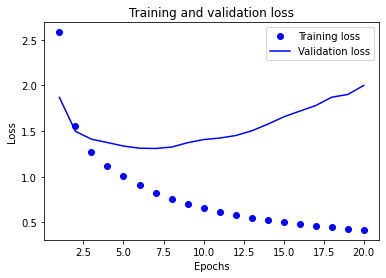

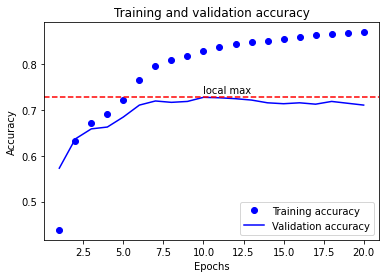

hits_array.mean(): 0.18210151380231523
This means a random classifier would score around 18.21% classification accuracy.
(46,)
0.99999994
3


In [41]:
# model with an information bottleneck
def listing4_22():
    import tensorflow
    from tensorflow import keras
    from tensorflow.keras import layers
    from tensorflow.keras.datasets import reuters
    from tensorflow.keras.utils import to_categorical
    import numpy as np
    import matplotlib.pyplot as plt
    
    # load data
    (train_data, train_labels), (test_data, test_labels) = reuters.load_data(
        num_words = 10_000
    )
        
    # prepare data
    def vectorize_sequences(sequences, dimension=10_000):
        # create all-zero matrix
        results = np.zeros((len(sequences), dimension))
        for i, sequence in enumerate(sequences):
            for j in sequence:
                # set indices of results[i,j] to 1s
                results[i, j] = 1.
        return results
    
    
    x_train = vectorize_sequences(train_data)
    x_test = vectorize_sequences(test_data)
        
    y_train = to_categorical(train_labels)
    y_test = to_categorical(test_labels)
    
    # build model, assume 46 possible classes
    model = keras.Sequential([
        layers.Dense(64, activation='relu'),
        # reduced to 4
        layers.Dense(4, activation='relu'),
        layers.Dense(46, activation='softmax')
    ])
    
    model.compile(
        optimizer="rmsprop",
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    
    # creating validation data
    x_val = x_train[:1000]
    partial_x_train = x_train[1000:]
    y_val = y_train[:1000]
    partial_y_train = y_train[1000:]
    
    # train model
    history = model.fit(
        partial_x_train,
        partial_y_train,
        epochs=20,
        batch_size=128,
        validation_data=(x_val, y_val),
        verbose=0,
    )
    
    print(history.history.keys())
    print()
    
    result = model.evaluate(x_test, y_test)
    print(f'result: {result}')
    print()
    
    epochs = range(1, len(history.history['loss'])+1)
    
    fig1 = plt.figure()
    ax1 = fig1.add_subplot()
    ax1.plot(epochs, history.history['loss'], "bo", label="Training loss")
    ax1.plot(epochs, history.history['val_loss'], "b", label="Validation loss")
    ax1.set_title("Training and validation loss")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")
    ax1.legend()
    
    # determine start of overfitting
    max_accuracy = np.max(history.history['val_accuracy'])
    print(f"max_accuracy: {max_accuracy}")
    print()
    
    fig2 = plt.figure()
    ax2 = fig2.add_subplot()
    ax2.plot(epochs, history.history['accuracy'], "bo", label="Training accuracy")
    ax2.plot(epochs, history.history['val_accuracy'], "b", label="Validation accuracy")
    ax2.set_title("Training and validation accuracy")
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Accuracy")
    ax2.axhline(y = max_accuracy, color = 'r', linestyle = '--')
    ax2.annotate('local max', xy=(10, max_accuracy+0.01))
    ax2.legend()
    
    plt.show()
    
    
    # With classes, check accuracy of a random baseline
    import copy
    test_labels_copy = copy.copy(test_labels)
    np.random.shuffle(test_labels_copy)
    hits_array = np.array(test_labels) == np.array(test_labels_copy)
    print(f'hits_array.mean(): {hits_array.mean()}')
    print(f"This means a random classifier would score around {hits_array.mean():.2%} classification accuracy.")
    
    
listing4_22()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

71/71 [==============================] - 0s 3ms/step - loss: 3.3289 - accuracy: 0.6848
result: [3.328925132751465, 0.6847729086875916]

max_accuracy: 0.7269999980926514



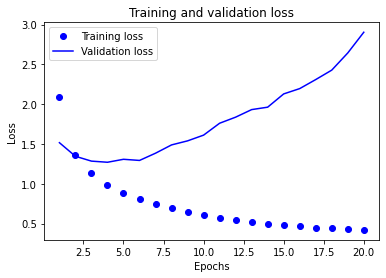

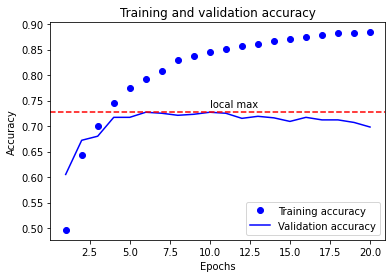

hits_array.mean(): 0.19768477292965272
This means a random classifier would score around 19.77% classification accuracy.


In [42]:
# model with an information bottleneck
def listing4_23():
    import tensorflow
    from tensorflow import keras
    from tensorflow.keras import layers
    from tensorflow.keras.datasets import reuters
    from tensorflow.keras.utils import to_categorical
    import numpy as np
    import matplotlib.pyplot as plt
    
    # load data
    (train_data, train_labels), (test_data, test_labels) = reuters.load_data(
        num_words = 10_000
    )
        
    # prepare data
    def vectorize_sequences(sequences, dimension=10_000):
        # create all-zero matrix
        results = np.zeros((len(sequences), dimension))
        for i, sequence in enumerate(sequences):
            for j in sequence:
                # set indices of results[i,j] to 1s
                results[i, j] = 1.
        return results
    
    
    x_train = vectorize_sequences(train_data)
    x_test = vectorize_sequences(test_data)
        
    y_train = to_categorical(train_labels)
    y_test = to_categorical(test_labels)
    
    # build model, assume 46 possible classes
    model = keras.Sequential([
        layers.Dense(64, activation='relu'),
        # reduced to 4
        layers.Dense(4, activation='relu'),
        layers.Dense(46, activation='softmax')
    ])
    
    model.compile(
        optimizer="rmsprop",
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    
    # creating validation data
    x_val = x_train[:1000]
    partial_x_train = x_train[1000:]
    y_val = y_train[:1000]
    partial_y_train = y_train[1000:]
    
    # train model
    history = model.fit(
        partial_x_train,
        partial_y_train,
        epochs=20,
        batch_size=32, # moved down to 32
        validation_data=(x_val, y_val),
        verbose=0,
    )
    
    print(history.history.keys())
    print()
    
    result = model.evaluate(x_test, y_test)
    print(f'result: {result}')
    print()
    
    epochs = range(1, len(history.history['loss'])+1)
    
    fig1 = plt.figure()
    ax1 = fig1.add_subplot()
    ax1.plot(epochs, history.history['loss'], "bo", label="Training loss")
    ax1.plot(epochs, history.history['val_loss'], "b", label="Validation loss")
    ax1.set_title("Training and validation loss")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")
    ax1.legend()
    
    # determine start of overfitting
    max_accuracy = np.max(history.history['val_accuracy'])
    print(f"max_accuracy: {max_accuracy}")
    print()
    
    fig2 = plt.figure()
    ax2 = fig2.add_subplot()
    ax2.plot(epochs, history.history['accuracy'], "bo", label="Training accuracy")
    ax2.plot(epochs, history.history['val_accuracy'], "b", label="Validation accuracy")
    ax2.set_title("Training and validation accuracy")
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Accuracy")
    ax2.axhline(y = max_accuracy, color = 'r', linestyle = '--')
    ax2.annotate('local max', xy=(10, max_accuracy+0.01))
    ax2.legend()
    
    plt.show()
    
    
    # With classes, check accuracy of a random baseline
    import copy
    test_labels_copy = copy.copy(test_labels)
    np.random.shuffle(test_labels_copy)
    hits_array = np.array(test_labels) == np.array(test_labels_copy)
    print(f'hits_array.mean(): {hits_array.mean()}')
    print(f"This means a random classifier would score around {hits_array.mean():.2%} classification accuracy.")
    
    
listing4_23()